In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('Cars93.csv')
Horsepower = np.array(data['Horsepower'])
Price = np.array(data['Price'])
matriz = np.array([Horsepower,Price])

In [71]:
mcov = np.cov(matriz)
val,vect = np.linalg.eig(mcov)
val1 = val[0]
val2 = val[1]
vec1 = vect[:,0]
vec2 = vect[:,1]
m1 = vec1[1]/vec1[0]
m2 = vec2[1]/vec2[0]
x0 = np.linspace(Horsepower.min(),Horsepower.max(),100)
x1 = np.linspace(176,181.5)
y0 = m1*x0
po = int(len(y0)/2)
b = y0[po]-m2*x0[po]
y1 = m2*x1+b

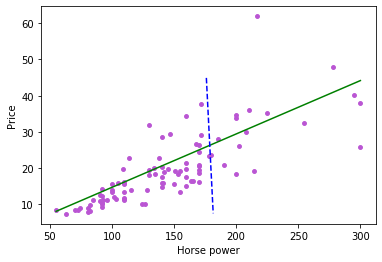

In [72]:
plt.figure()
plt.scatter(Horsepower,Price,s=15,c='mediumorchid')
plt.plot(x0,y0,c='g')
plt.plot(x1,y1,c='b',linestyle="--")
plt.xlabel('Horse power')
plt.ylabel('Price')
plt.savefig('regression1.png')

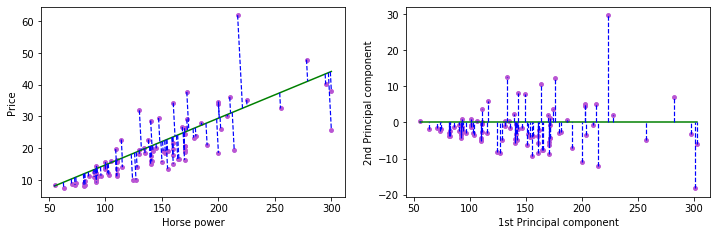

In [82]:
plt.figure(figsize=(12,3.5))
plt.subplot(1,2,1)
plt.scatter(Horsepower,Price,s=15,c='mediumorchid')
plt.plot(x0,y0,c='g')
Xm = []
Ym = []
for i in range(len(Horsepower)):
    bn = Price[i]-m2*Horsepower[i]
    xm = bn/(m1-m2)
    Xm.append(xm)
    if (Horsepower[i]>xm):
        xn = np.linspace(xm,Horsepower[i])
    else:
        xn = np.linspace(Horsepower[i],xm)
    Ym.append(m2*xm+bn)
    yn = m2*xn+bn
    plt.plot(xn,yn,c='b',linewidth=1.2,linestyle='--')
plt.xlabel('Horse power')
plt.ylabel('Price')
Xm = np.array(Xm)
Ym = np.array(Ym)
P = []
H = []
for i in range(len(Horsepower)):
    v = [Horsepower[i],Price[i]]
    H.append(np.dot(v,vec1))
    P.append(np.dot(v,vec2))
H = np.array(H)
P = np.array(P)
plt.subplot(1,2,2)
plt.scatter(H,P,s=15,c='mediumorchid')
plt.plot(np.linspace(H.min(),H.max(),100),np.zeros(100),c='g')
for i in range(len(H)):
    if (P[i]>0):
        yi = np.linspace(0,P[i])
    else:
        yi = np.linspace(P[i],0)
    xi = np.ones(50)*H[i]
    plt.plot(xi,yi,c='b',linewidth=1.2,linestyle='--')
plt.xlabel('1st Principal component')
plt.ylabel('2nd Principal component')
plt.savefig('regression2.png')